<a href="https://colab.research.google.com/github/HanseHa/colab/blob/main/Chapter7_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7:  Data Science

**This is a chapter in the book Minimal Python**

* [Buy a copy on LeanPub](https://leanpub.com/minimalpython)
* [Buy a copy from Amazon](https://www.amazon.com/Minimal-Python-efficient-programmer-onemillion2021-ebook/dp/B0855NSRR7)

[*Licensed Under Attribution-NonCommercial-ShareAlike 4.0*](https://creativecommons.org/licenses/by-nc-sa/4.0/)

![Minimal Python Book](https://d2sofvawe08yqg.cloudfront.net/minimalpython/hero?1582640276)

## Ingest

*COVID-19 Data from [New York Times Github](https://github.com/nytimes/covid-19-data)*

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Last five rows

In [3]:
# test change

In [4]:
df.tail()

,date,state,fips,cases,deaths
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485
61941,2023-03-23,Wyoming,56,185800,2014


*What are the columns?*

In [5]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

*What is the shape:  i.e. rows,columns?*

In [6]:
df.shape

(61942, 5)

## EDA

*What are general characteristics of the data?  A good way to find out is `df.describe`*

In [7]:
df.describe()

,fips,cases,deaths
count,61942.000000,6.194200e+04,61942.000000
mean,32.247958,8.898301e+05,11779.067499
std,18.788383,1.470231e+06,17345.774849
min,1.000000,1.000000e+00,0.000000
25%,17.000000,7.078350e+04,1171.000000
50%,31.000000,3.514960e+05,5035.000000
75%,46.000000,1.043231e+06,14912.000000
max,78.000000,1.216916e+07,104277.000000


*Cases and Deaths in the USA due to Covid-19*

<Axes: xlabel='cases', ylabel='deaths'>

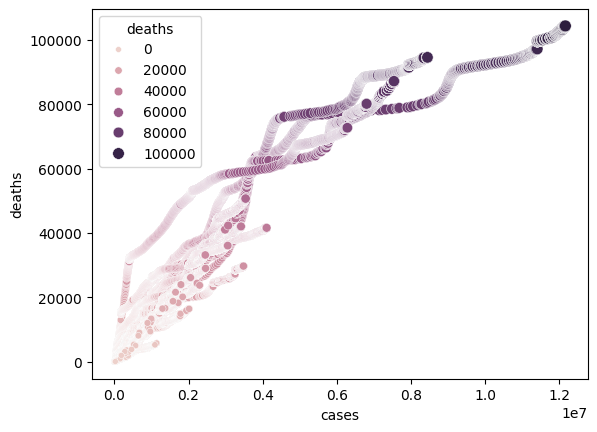

In [8]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths",
                hue="deaths",size="deaths", data=df)

### Date-based EDA

*Dealing with dates by setting index*

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

*Filter results by date range*

In [10]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2025-05-28
Two days ago 2025-05-26


In [26]:
td='2022-01-20'
tmrr='2023-01-27'
df.loc[td:tmrr].head()

,state,fips,cases,deaths
date,,,,
2022-01-20,Alabama,1,1104356,16792
2022-01-20,Alaska,2,187655,1027
2022-01-20,American Samoa,60,18,0
2022-01-20,Arizona,4,1683915,25429
2022-01-20,Arkansas,5,713643,9470


*The distribution of the data by date*

<ipython-input-27-efe4c09d3ad9>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[td:tmrr]["deaths"], shade=True)


<Axes: xlabel='deaths', ylabel='Density'>

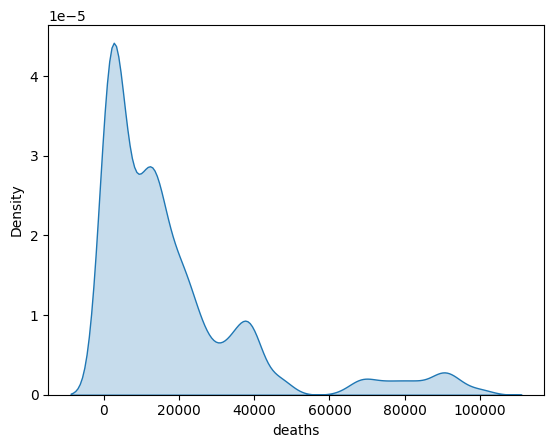

In [27]:
# sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)
# adapt dates to be far ahaed
sns.kdeplot(df.loc[td:tmrr]["deaths"], shade=True)


*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [29]:
current_df = df.loc[td:tmrr].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2023-01-27,California,6,11980295,102283
2023-01-26,California,6,11979032,102259
2023-01-25,California,6,11960085,102102
2023-01-24,California,6,11958856,102053
2023-01-23,California,6,11957890,102025
2023-01-22,California,6,11955660,101983
2023-01-20,California,6,11955605,101982
2023-01-21,California,6,11955605,101982
2023-01-19,California,6,11954442,101957


*There should be 50 states and District of Columbia*

In [30]:
current_df.shape

(20888, 4)

### State Based Analysis

*Get 10 states and subset*

In [31]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California']

In [32]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

*Verify the unique states left is the same 10*

In [33]:
set(top_states_df.state.values)

{'California'}

In [34]:
top_states_df

,state,cases,deaths
date,,,
2020-01-25,California,1,0
2020-01-26,California,2,0
2020-01-27,California,2,0
2020-01-28,California,2,0
2020-01-29,California,2,0
...,...,...,...
2023-03-19,California,12153083,104130
2023-03-20,California,12154293,104165
2023-03-21,California,12154941,104185


<Figure size 1500x500 with 0 Axes>

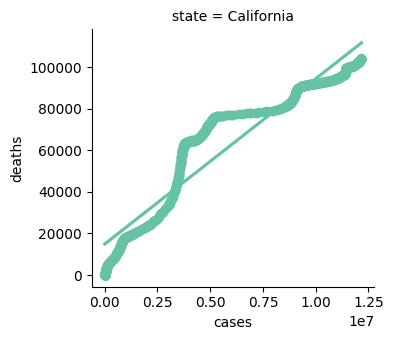

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state",
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [36]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,California,112,1
2020-03-09,California,172,2
2020-03-10,California,179,3
2020-03-11,California,202,4
2020-03-12,California,252,4


In [37]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_march_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

### Search for Features:  Political, Health and Finance

*Sugar Intake By State*

In [40]:
cdc_2013.head()

,Employed,Not employed,Retired,<High school,High school,Some college,College graduate
State,,,,,,,
Alaska,26.2 (23.6–28.9),32.1 (27.8–36.8),16.0 (12.6–20.2),47.1 (37.8–56.5),34.9 (31.1–38.9),24.2 (21.0–27.8),12.9 (10.5–15.7)
Arizona,33.0 (28.5–37.8),28.7 (23.5–34.5),13.8 (10.8–17.5),40.4 (30.9–50.7),36.5 (30.7–42.7),24.4 (19.9–29.4),14.6 (11.6–18.3)
California,22.9 (20.9–25.1),30.2 (27.1–33.4),15.0 (12.2–18.2),38.5 (34.2–43.0),29.9 (26.5–33.7),21.4 (18.8–24.2),11.5 (9.8–13.5)
Connecticut,18.9 (17.1–20.9),24.3 (20.8–28.2),15.0 (12.7–17.7),27.8 (22.4–33.9),26.9 (23.7–30.3),19.9 (17.2–23.0),10.2 (8.7–12.0)
District of Columbia,18.5 (15.7–21.7),34.6 (29.5–40.1),18.5 (15.3–22.1),45.6 (36.4–55.2),39.0 (33.1–45.2),28.9 (23.4–35.0),8.4 (7.0–10.1)


In [38]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])

cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

ValueError: Unable to parse string "26.2 (23.6–28.9)" at position 0

*Combine Sugar Data and Covid-19 Data*

In [41]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
sugar_covid_df.head()

KeyError: "None of [Index(['employed-sugar-intake-daily', 'state'], dtype='object')] are in the [columns]"

*What about data from the 2016 Election?*

In [ ]:
election_df = pd.read_csv("https://raw.githubusercontent.com/paiml/minimal-python/master/data/2016-Electoral-Votes.csv")
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

In [ ]:
sugar_covid_df = sugar_covid_df.merge(election_df, how="inner", on="state")
sugar_covid_df.head()

*Generate Heatmap*

In [ ]:
sugar_covid_df.corr()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=sugar_covid_df.corr(),
                   x=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   y=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   hoverongaps = False))
fig.show()

In [ ]:
sugar_covid_df.to_csv("covid-eda.csv")

*What about Real-Estate Data?*

## Modeling

## Conclusion
